##타이타닉 데이터준비

### 타이타닉 데이터 설명

탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

###타이타닉 탑승자 데이터 불러오기

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 글꼴 설치 (런타임후 재시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트오리엔테이션/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##데이터 타입과 결측값 확인하기

In [4]:
# 데이터 종류 확인하기
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


1309개의 샘플 , 결측치 확인 

In [5]:
titanic.isnull().sum()
#결측치 확인결과 age,cabin,embarked,boat,body,home.dest에서 확인됨. 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
titanic.describe()
#기초 통계랑 확인

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
corr_sort = titanic.corr().loc[:,'survived'].abs().sort_values(ascending=False) ## 생존률과 상관계수가 높은 순서대로 출력 , abs()로 상관계수의값을 양수로 모두 변경 , 내림차순 정렬 
corr_sort

survived    1.000000
pclass      0.312469
fare        0.244265
parch       0.082660
age         0.055512
sibsp       0.027825
body             NaN
Name: survived, dtype: float64

##데이터 분포 확인하기

###성별에 따른 생존자 분류

In [8]:
#샘플링으로 데이터 살펴보기 
pd.pivot_table(data =titanic , index =["sex"] , values = ["survived"] , aggfunc =["sum","mean","count"])

,sum,mean,count
,survived,survived,survived
sex,,,
female,339,0.727468,466
male,161,0.190985,843


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


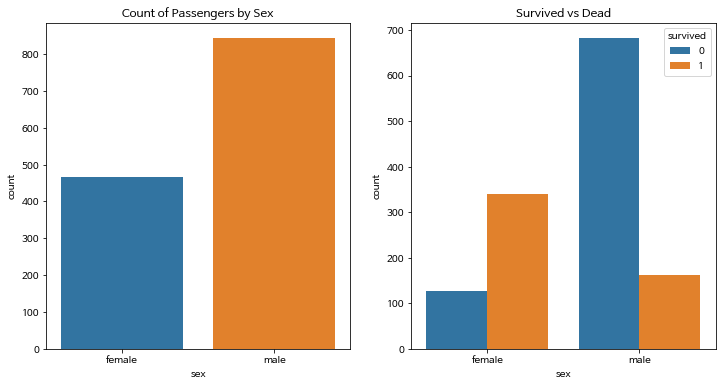

In [9]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)

sns.countplot('sex',data=titanic, ax=graph1)
graph1.set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=titanic, ax=graph2)
graph2.set_title('Survived vs Dead')
plt.show()

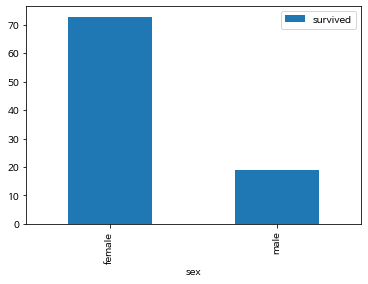

In [10]:
how = {
    'survived': np.mean
}

stat= titanic.groupby('sex').agg( how ) * 100
stat.plot.bar()


생존 비율로 확인결과 여자는 70프로가 생존하였고 남자는 20퍼 정도로
여자가 생존확률이 높은것을 확인할수있습니다.

###나이에 따른 생존자 분류

In [11]:
titanic.groupby('age')['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.17,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
0.33,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.42,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
0.67,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
0.75,3.0,0.666667,0.57735,0.0,0.5,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
70.50,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
71.00,2.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
74.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [12]:
titanic.loc[ titanic['age'] <= 9, 'age_group'] = 0
titanic.loc[(titanic['age'] > 9) & (titanic['age'] <= 19), 'age_group'] = 10
titanic.loc[(titanic['age'] > 19) & (titanic['age'] <= 29), 'age_group'] = 20
titanic.loc[(titanic['age'] > 29) & (titanic['age'] <= 39), 'age_group'] = 30
titanic.loc[(titanic['age'] > 39) & (titanic['age'] <= 49), 'age_group'] = 40
titanic.loc[(titanic['age'] > 49) & (titanic['age'] <= 59), 'age_group'] = 50
titanic.loc[(titanic['age'] > 59) & (titanic['age'] <= 69), 'age_group'] = 60
titanic.loc[(titanic['age'] > 69) & (titanic['age'] <= 79), 'age_group'] = 70
titanic.loc[(titanic['age'] > 79) & (titanic['age'] <= 89), 'age_group'] = 80

In [13]:
titanic.loc[(titanic['age_group'] >= 0) & (titanic['age_group'] <= 10), 'age_group_nm'] = "유아"
titanic.loc[(titanic['age_group'] > 9) & (titanic['age_group'] <= 19), 'age_group_nm'] = "청소년"
titanic.loc[(titanic['age_group'] > 19) & (titanic['age_group'] <= 39), 'age_group_nm'] = "청년"
titanic.loc[(titanic['age_group'] > 39) & (titanic['age_group'] <= 59), 'age_group_nm'] = "중장년"
titanic.loc[(titanic['age_group'] > 59) ,'age_group_nm' ]= "노인"

In [14]:
pd.pivot_table(data =titanic , index =["age_group_nm","sex"] , values = ["survived"] , aggfunc =["sum","mean","count"])

sum      mean    count
                    survived  survived survived
age_group_nm sex                               
노인           female        9  0.818182       11
             male          3  0.103448       29
유아           female       25  0.641026       39
             male         25  0.581395       43
중장년          female       61  0.835616       73
             male         23  0.174242      132
청년           female      150  0.746269      201
             male         75  0.200000      375
청소년          female       47  0.734375       64
             male          9  0.113924       79

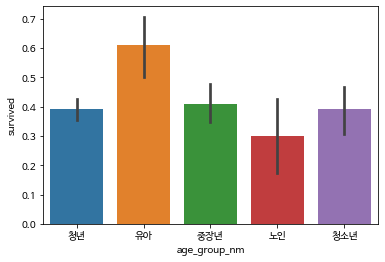

In [15]:
sns.barplot(x='age_group_nm' , y = 'survived',
         data=titanic)

유아 생존률이 높고 노인 생존률이 낮은것을 확인할수있습니다.

### 등급에 따른 생존자 분류

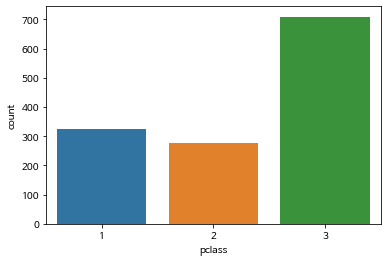

In [16]:
sns.countplot(x='pclass',data=titanic)

In [17]:
titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body,age_group
pclass,,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571,34.577465
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097,25.249042
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182,20.459082


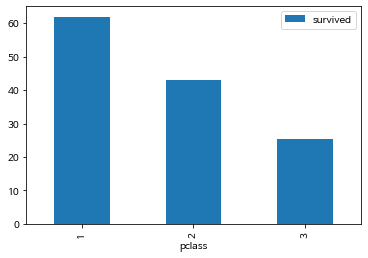

In [18]:
how = {
    'survived': np.mean
}

stat= titanic.groupby('pclass').agg( how ) * 100
stat.plot.bar()


1등급에 탄 사람들이 생존을 많이했습니다

In [19]:
pd.pivot_table(data =titanic , index =["pclass" , "sex"] , values = ["survived"] , aggfunc =["sum","mean","count"])

sum      mean    count
              survived  survived survived
pclass sex                               
1      female      139  0.965278      144
       male         61  0.340782      179
2      female       94  0.886792      106
       male         25  0.146199      171
3      female      106  0.490741      216
       male         75  0.152130      493

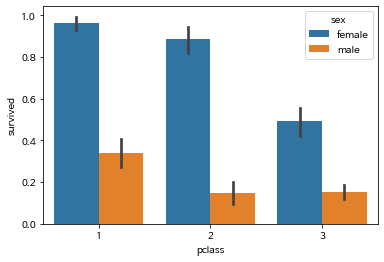

In [20]:
sns.barplot(x='pclass' , y = 'survived',
         hue = 'sex',
         data=titanic)

모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.
또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.

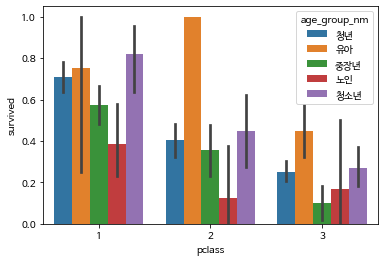

In [21]:
sns.barplot(x='pclass' , y = 'survived',
         hue = 'age_group_nm',
         data=titanic)

등급과 나이 분표별 생존률이다.
청년과 청소년이 많이 살아남은것을 확인할수있다.

###선착장에 따른 생존자 분류

In [22]:
titanic.pivot_table('survived',index= 'embarked', columns='pclass',margins=True)

pclass,1,2,3,All
embarked,,,,
C,0.687943,0.571429,0.366337,0.555556
Q,0.666667,0.285714,0.353982,0.357724
S,0.559322,0.417355,0.210101,0.332604
All,0.616822,0.429603,0.255289,0.381025


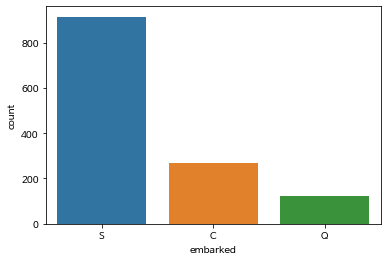

In [23]:
sns.countplot(x='embarked',data=titanic)

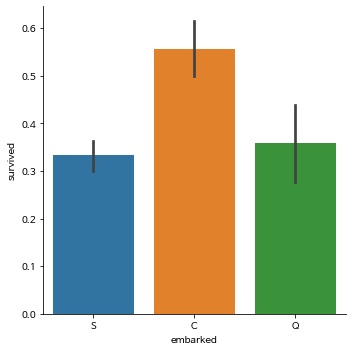

In [24]:
sns.catplot(x='embarked', y= 'survived',kind ='bar',data=titanic)

C선착장에서 탄 사람들이 생존률이 높은것을 확인할수있습니다.

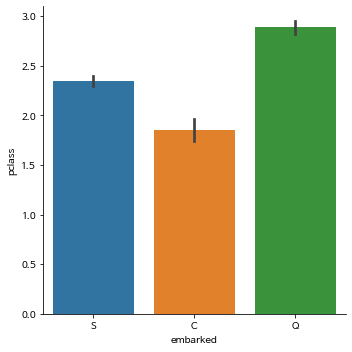

In [25]:
sns.catplot(x='embarked', y= 'pclass',kind ='bar',data=titanic)

C 선착장이 생존확률이 높은건 클래스가 높은사람이 많이탄 이유로 예측됩니다.

### 동반자 에 따른 생존자 분류

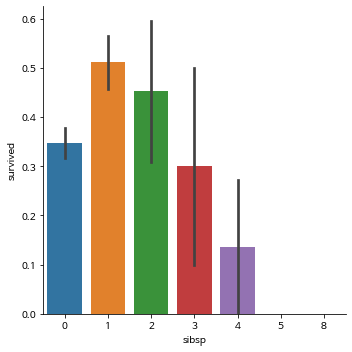

In [26]:
sns.catplot(x='sibsp', y= 'survived',kind ='bar',data=titanic)

혼자 있는 경우보다 동반자가 있을때  생존을 많이했습니다.

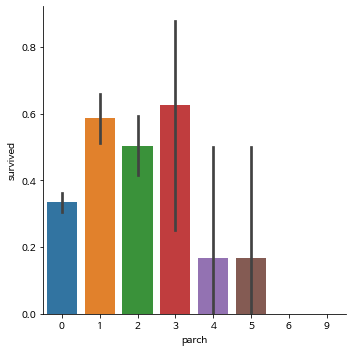

In [27]:
sns.catplot(x='parch', y= 'survived',kind ='bar',data=titanic)

자녀유무에따른 생존 확률입니다.
데이터가 부정확하여 제대로 확인이 불가능하지만 1~3명이 같이있을때 생존확률이높습니다.

In [28]:
titanic['family']= titanic['sibsp']+titanic['parch']+1
## 자기 자신과 sibsp와 parch를 합치면 family가 될것입니다.
## 가족으로 바꾸어 생존률을 보겠습니다.

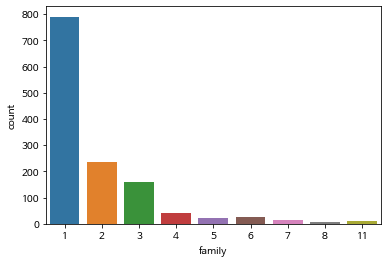

In [29]:
sns.countplot(x='family',data=titanic)

1명이 대부분이고 그다음으로 2,3명 단위로 가족을 이루는것을 확인할수있습니다.

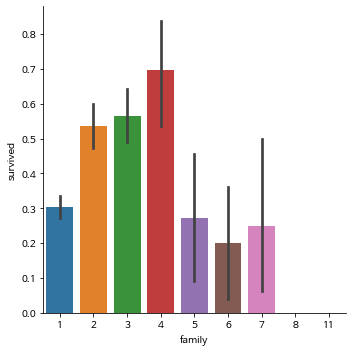

In [30]:
sns.catplot(x='family', y= 'survived',kind ='bar',data=titanic)

2,3,4명단위 가족에서 생존률이 높았고 너무적거나(1명) 너무많아도(5,6,7) 생존확률이 낮은것을 확인할수있습니다.

###이름에 따른 생존자 분류


In [31]:
titanic['Firstnm']= titanic.name.str.extract('([A-Za-z]+)\.')

In [32]:
titanic['Firstnm']
pd.crosstab(titanic['Firstnm'], titanic['sex']).T.style.background_gradient(cmap='summer_r')


Firstnm,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


탑승객이름에 붙는 Miss,Mr,Mrs 등 영어 호칭이 존재합니다.
영어 호칭에따라 남자 여자를 분류해보았습니다


In [33]:
titanic['Firstnm'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr', 'Mrs'],inplace=True)

Master,Miss,Mr,Mrs 가 아닌 다른 호칭들은 값이 제일많은것들로 데이터를 치환하겠습니다.

In [34]:
titanic.groupby('Firstnm').mean()

,pclass,survived,age,sibsp,parch,fare,body,age_group,family
Firstnm,,,,,,,,,
Master,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.000000,1.886792,4.426230
Miss,2.332075,0.679245,21.834533,0.652830,0.494340,42.667628,229.333333,17.663551,2.147170
Mr,2.348659,0.167305,32.811056,0.286079,0.159642,25.385682,164.118182,28.415842,1.445722
Mrs,1.925000,0.790000,37.046243,0.655000,0.820000,50.977312,129.000000,32.138728,2.475000


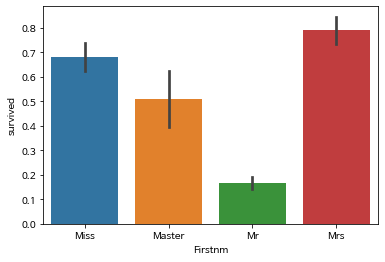

In [40]:
sns.barplot(x='Firstnm', y= 'survived',data=titanic)


*   여성이름인 Mrs,Miss가 생존률이 높은것을 확인할 수 있고 
*   남성이름인 Master,Mr가 생존률이 낮은것을 확인할 수 있습니다.

###  생존자 분류 통합그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

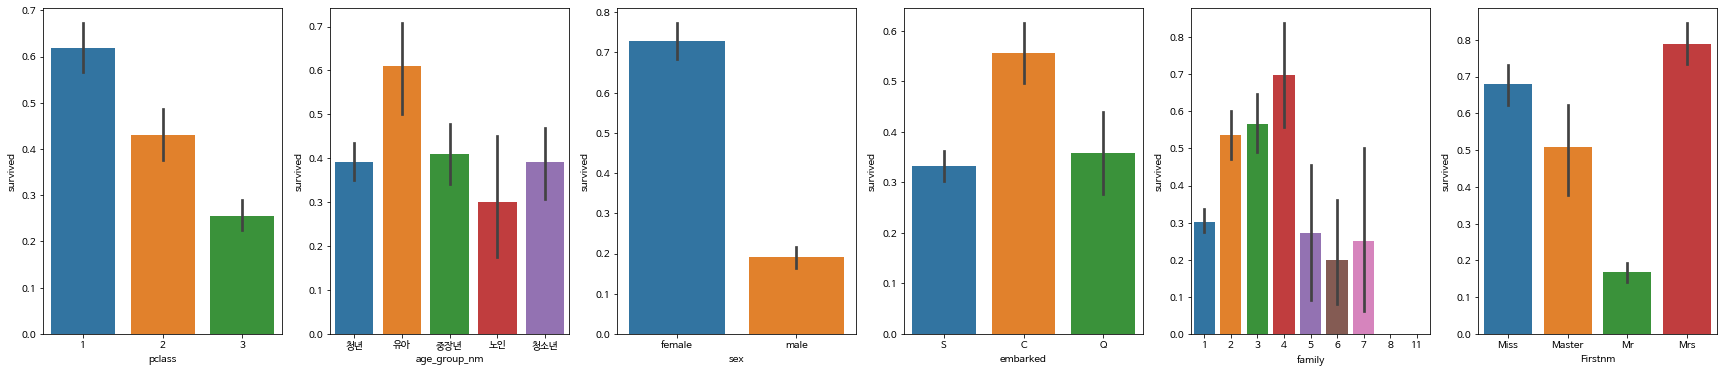

In [36]:
fig = plt.figure(figsize=(30,6))
graph1 = fig.add_subplot(1,6,1)
graph2 = fig.add_subplot(1,6,2)
graph3 = fig.add_subplot(1,6,3)
graph4 = fig.add_subplot(1,6,4)
graph5 = fig.add_subplot(1,6,5)
graph6 = fig.add_subplot(1,6,6)
sns.barplot('pclass', 'survived', data=titanic, ax=graph1)
sns.barplot('age_group_nm', 'survived', data=titanic, ax=graph2)
sns.barplot('sex', 'survived', data=titanic, ax=graph3)
sns.barplot('embarked', 'survived', data=titanic, ax=graph4)
sns.barplot('family', 'survived', data=titanic, ax=graph5)
sns.barplot(x='Firstnm', y= 'survived',data=titanic, ax=graph6)

#결론


*   여성이 남성보다 생존 가능성이 높았습니다.(레이디 퍼스트)
*   1등실 승객들이 가장 생존율이 높았고 이어 2등실, 3등실 승객순이었다.
 상류층 사람들이 생존 가능성이 높다는걸 알 수있습니다.
*   연령대만 봤을 때 큰 차이는 없지만 어린아이들과 3-40대 연령대의 생존 가능성이 높았습니다.
